# **Building a Deep Neural Network Regression Model using TensorFlow**

### **Load and Explore the Dataset**

In [14]:
import pandas as pd

data = pd.read_csv('Life_expectancy_dataset.csv', encoding='ISO-8859-1')
print(data.head())
# Display basic information about the dataset
print(data.info())

   Rank       Country  Overall Life  Male Life  Female Life Continent
0     1        Monaco          89.5       85.6         93.5    Europe
1     2         Japan          85.0       81.7         88.5      Asia
2     3     Singapore          85.0       82.3         87.8      Asia
3     4  Macau; China          84.5       81.6         87.6      Asia
4     5    San Marino          83.3       80.7         86.1    Europe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB
None


### **Preprocessing**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Handle non-numeric columns (For simplicity, we drop them in this example)
data = data.drop(columns=non_numeric_columns)

# Handle missing values by filling them with the mean of the column
data = data.fillna(data.mean())

Non-numeric columns: Index(['Country', 'Continent'], dtype='object')


### **Selecting the feature and target variable**

X: All columns except Overall Life, 
y: Target (Overall Life expectancy)

In [16]:
# Separate features and target variable
X = data.drop(columns=['Overall Life'])
y = data['Overall Life']

### **Splitting the Dataset**

Split the data into training (80%) and testing (20%) sets.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Standardizing the Data**

Standardize the feature data to have a mean of 0 and variance of 1.

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Defining the Model**

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

### **Compiling the Model**

Compiling the model using the Adam optimizer, mean squared error loss function, and mean absolute error as an additional metric.

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

### **Training the Model**

Train the model on the training data for 100 epochs.
Use 20% of the training data for validation.

In [21]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 1s 37ms/step - loss: 5373.0386 - mae: 72.8014 - val_loss: 5170.2197 - val_mae: 71.3368
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 5327.7314 - mae: 72.4774 - val_loss: 5122.9282 - val_mae: 70.9855
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 5275.1699 - mae: 72.0997 - val_loss: 5063.1074 - val_mae: 70.5396
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 5207.8706 - mae: 71.6120 - val_loss: 4985.0776 - val_mae: 69.9539
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 5119.3945 - mae: 70.9753 - val_loss: 4881.6167 - val_mae: 69.1690
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 4999.3530 - mae: 70.0941 - val_loss: 4740.9854 - val_mae: 68.0877
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 4835.1387 - mae: 68.8690 - val_loss: 4552.4185 - val_mae: 66.6063
Epoch 8/100
5/5 [======================

### **Evaluating the Model**

Evaluate the model on the test data and print the loss and mean absolute error.

In [22]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')

2/2 [==============================] - 0s 4ms/step - loss: 7.6463 - mae: 1.5926
Test MAE: 1.592597484588623


### **Making Predictions**

Make predictions on the test data and print the predicted values.

In [23]:
predictions = model.predict(X_test)
print(predictions)

2/2 [==============================] - 0s 3ms/step
[[82.9452  ]
 [75.120094]
 [77.362404]
 [74.3123  ]
 [52.397182]
 [76.3668  ]
 [75.55248 ]
 [75.60737 ]
 [63.091072]
 [63.92248 ]
 [76.38226 ]
 [82.17715 ]
 [60.434948]
 [81.22571 ]
 [80.41126 ]
 [77.634605]
 [65.23303 ]
 [75.634026]
 [55.275036]
 [74.77972 ]
 [74.660286]
 [82.92811 ]
 [74.497   ]
 [74.82429 ]
 [74.499115]
 [74.314255]
 [60.681286]
 [74.767586]
 [75.64094 ]
 [75.55904 ]
 [54.065273]
 [74.84286 ]
 [81.24293 ]
 [63.747807]
 [69.21673 ]
 [75.98098 ]
 [68.20081 ]
 [76.357124]
 [75.18483 ]
 [62.818066]
 [57.216366]
 [57.49011 ]
 [63.85909 ]
 [77.12499 ]
 [66.113976]]


### **Plotting the Results**

Plot the training and validation loss as well as the mean absolute error over the epochs.

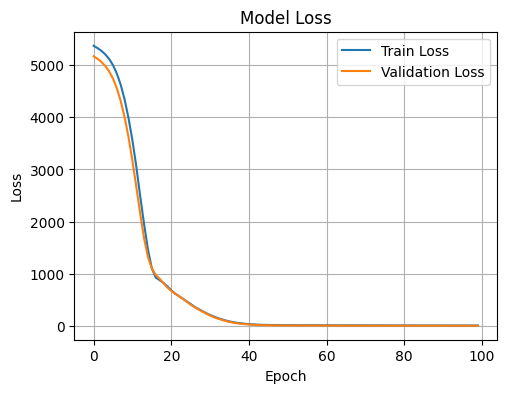

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()
plt.show()